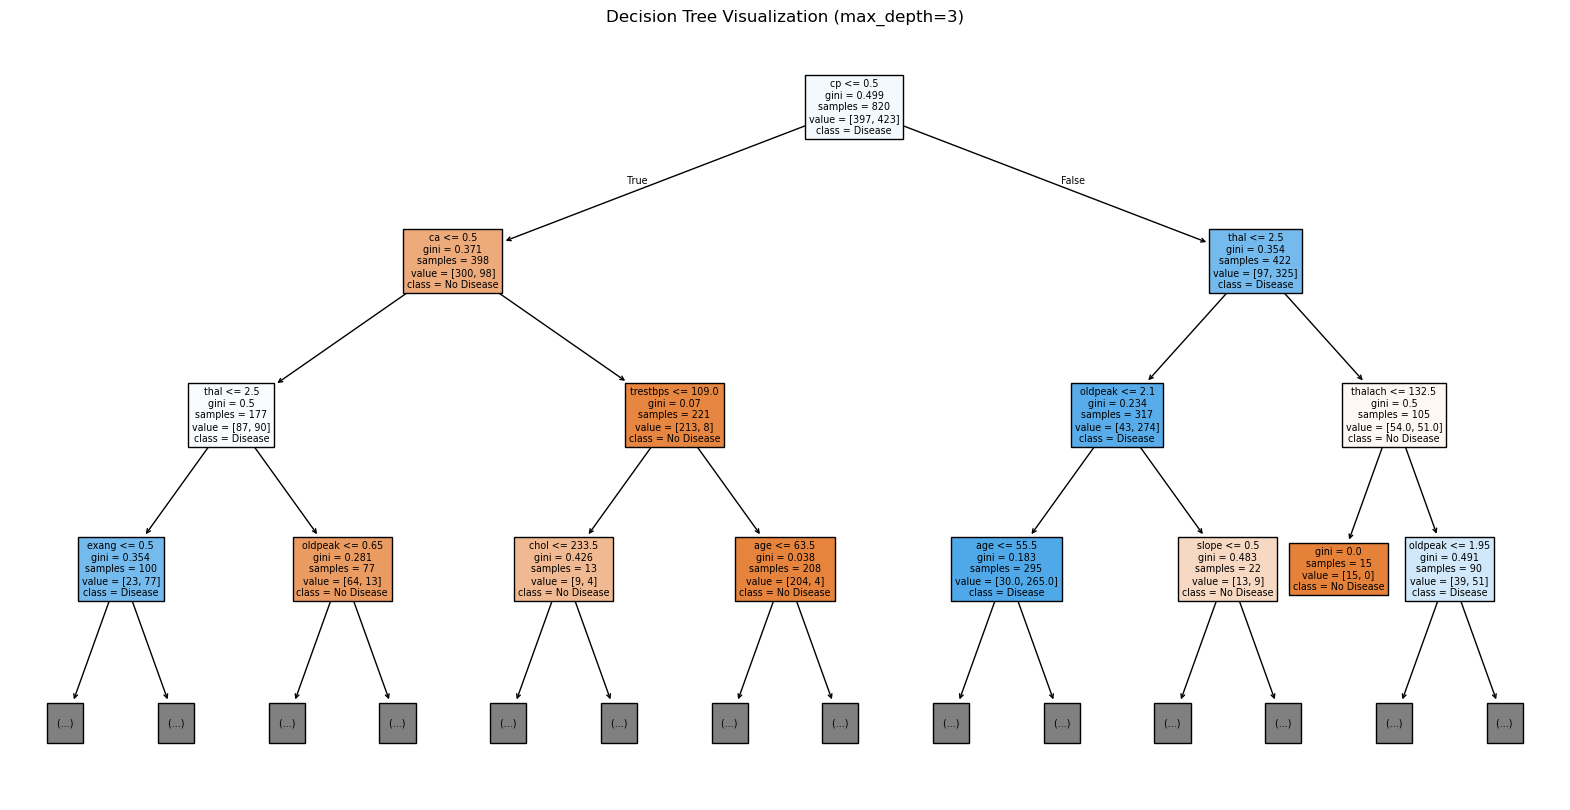

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

Decision Tree Accuracy (Train): 1.0
Decision Tree Accuracy (Test): 0.9853658536585366

Pruned Decision Tree Accuracy (Test): 0.8

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

Random Forest Accuracy (Test): 0.9853658536585366


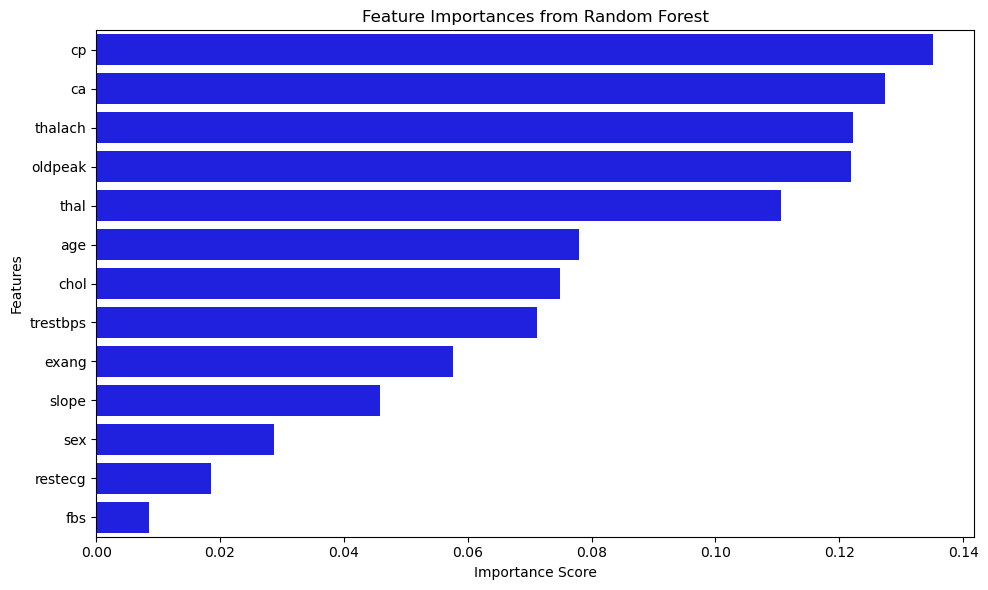


Cross-Validation Accuracy Scores: [1.         1.         1.         1.         0.98536585]
Mean CV Accuracy: 0.9970731707317073


In [7]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
df = pd.read_csv(r"C:\Users\Admin\Desktop\heart.csv")  # Ensure this file is in your working directory

# Split data into features and target
X = df.drop("target", axis=1)
y = df["target"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Train Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Visualize Decision Tree (limited to max depth = 3)
plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=X.columns, class_names=["No Disease", "Disease"], filled=True, max_depth=3)
plt.title("Decision Tree Visualization (max_depth=3)")
plt.show()

# Evaluate Decision Tree
y_pred_dt = dt.predict(X_test)
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))
print("Decision Tree Accuracy (Train):", accuracy_score(y_train, dt.predict(X_train)))
print("Decision Tree Accuracy (Test):", accuracy_score(y_test, y_pred_dt))

# 2. Control overfitting with pruned tree
dt_pruned = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_pruned.fit(X_train, y_train)
y_pred_pruned = dt_pruned.predict(X_test)
print("\nPruned Decision Tree Accuracy (Test):", accuracy_score(y_test, y_pred_pruned))

# 3. Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Random Forest Accuracy (Test):", accuracy_score(y_test, y_pred_rf))

# 4. Feature Importances from Random Forest
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=importances.values, y=importances.index, color="blue")
plt.title("Feature Importances from Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

# 5. Evaluate using Cross-Validation
cv_scores = cross_val_score(rf, X, y, cv=5)
print("\nCross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())
